#                          Εργασία Αριθμητική Ανάλυση 2023

Παναγιώτης-Πολύδωρος Βογιατζής, 10855
 

Χρήστος Γούναρης, 10638

# 1. Παραγοντοποιήσεις LU και QR

In [1]:
import numpy as np

def LUmine(A):
    n =A.shape[0] 

    L = np.matrix(np.identity(n)) 
    U = A

    for j in range(0,n-1):
        for i in range(j+1,n):
            mult =A[i, j] / A[j,j]
            A[i, j + 1:n] = A[i, j+1:n] - mult*A[j, j+1:n]
            U[i, j + 1:n] =A[i, j + 1:n]
            L[i, j] = mult
            U[i, j] = 0

    return L, U

In [2]:
import numpy as np

def QRmine(A):

    n = A.shape[0]
    Q = np.matrix(np.zeros((n,n)))

    for j in range(A.shape[0]):  
        q = A[:, j]
    
        for i in range(j):
            length_of_leg = np.sum(A[:, j].T * Q[:, i])
            q = q - length_of_leg * Q[:, i]   
        Q[:,j] = q / np.linalg.norm(q)
    R = Q.T*A
    return Q, R


# 2. Πίνακες Hilbert

α)Δημιουργία ενός ΝxN Hilbert.

In [3]:
import numpy as np
import matplotlib.pyplot as plt


N = 4
H_list = []
for i in range(0, N):
    for j in range(0, N):
        H_list.append(1/(i+j+1))

Hlists = [H_list[i:i+N] for i in range(0, len(H_list), N)]
H = np.array(Hlists)
print(H)

[[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]]


β)Δημιουργία διανύσματος με στοιχεία ίσα με 1 και επίλυση του Hx=b χρησιμοποιώντας την LUmine.

In [4]:


L,U = LUmine(H)
b = np.ones((N, 1))

#Exw:H =LU,diladi LUx = b, thetw Ux = Y, opote Y = b*L^-1

L_inverse = np.linalg.inv(L)

Y = L_inverse*b

#Twra x = Y*U^-1

U_inverse = np.linalg.inv(U)

x = U_inverse*Y
print(x)

[[  -4.]
 [  60.]
 [-180.]
 [ 140.]]


γ)Μεταβάλλουμε την τιμή του b κατά 10^-15 και προκύπτει το νέο διάνυσμα b_new. Επιλύουμε το σύστημα Hx_new=b_new και υπολογίζουμε τη μέγιστη απόλυτη διαφορά.

In [5]:


b_new = b.copy()
b_new[0] = b_new[0] + 10**-15

Y_new = L_inverse.dot(b_new)

x_new = U_inverse.dot(Y_new)

print(np.max(np.abs(x - x_new)))

5.684341886080802e-14


Παρατηρούμε ότι το αποτέλεσμα ειναι πολύ μικρό. Το περιμέναμε, αφού η τιμή του πρώτου στοιχείου του διανλυσματος b μεταβλήθηκε και αυτή κατά πολύ λίγο (10^-15).

δ)Δημιουργία ένός διαγράμματος με τις τιμές του n στον οριζόντιο άξονα και τις τιμές της μέγιστης απόλυτης διαφοράς στον κατακόρυφο άξονα.

Text(0, 0.5, 'Μaximum Αbsolute Difference')

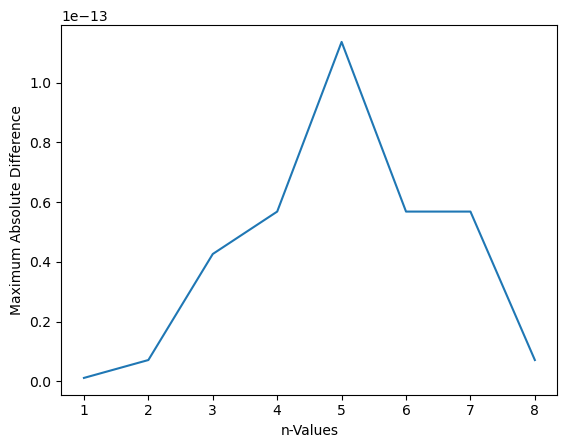

In [6]:
n = [1,2,3,4, 5, 6, 7, 8]
max_abs = []
norm_values = []

for number in n:
    H_listnew = []
    for i in range(0, number):
        for j in range(0, number):
            H_listnew.append(1 / (i + j + 1))

    Hlistsnew = [H_listnew[i:i + number] for i in range(0, len(H_listnew), number)]
    H = np.array(Hlistsnew)

    b = np.ones((number, 1))

    L, U = LUmine(H)

    L_inverse = np.linalg.inv(L)
    Y = L_inverse*b

    U_inverse = np.linalg.inv(U)
    x = U_inverse*Y

    b_new = b.copy()
    b_new[0] = b_new[0] + 10**-15

    Y_new = L_inverse*b_new

    x_new = U_inverse*Y_new
    max_abs.append(np.max(np.abs(x - x_new)))
    
plt.plot(n,max_abs)
plt.xlabel('n-Values')
plt.ylabel('Μaximum Αbsolute Difference')

Παρατηρούμε ότι για τις μικρές και μεγάλες τιμές του n, η μέγιστη απόλυτη διαφορά ελαχιστοποιείται. Έτσι, συμπεραίνουμε ότι ο πίνακας hilbert είναι πιο ασταθής στις μεσαιές τιμές του n.

ε)Υπολογισμός του ΗΗ^-1 και της 2-νόρμας της διαφοράς του μοναδιαίου πίνακα και του ΗΗ^-1.

Text(0, 0.5, '2-Norm difference')

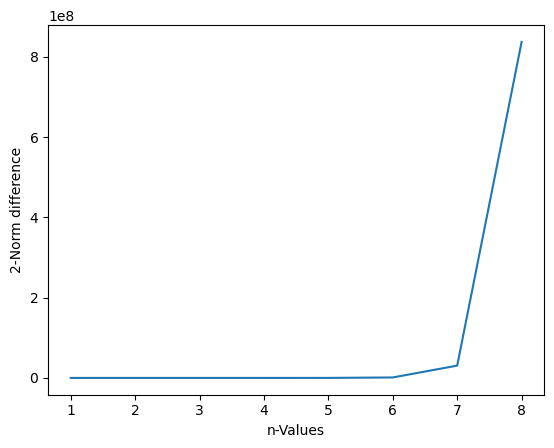

In [7]:
n = [1,2,3,4, 5, 6, 7, 8]
max_abs = []
norm_values = []

for number in n:
    H_listnew = []
    for i in range(0, number):
        for j in range(0, number):
            H_listnew.append(1 / (i + j + 1))

    Hlistsnew = [H_listnew[i:i + number] for i in range(0, len(H_listnew), number)]
    H = np.array(Hlistsnew)

    H_inverse = np.linalg.inv(H)

    diff = H_inverse*H-np.identity(number)
    norm_diff = np.linalg.norm(diff)
    norm_values.append(norm_diff)
    
plt.plot(n,norm_values)
plt.xlabel('n-Values')
plt.ylabel('2-Norm difference')

Παρατηρούμε ότι το διάγραμμα αυξάνεται απότομα για μεγάλες τιμές του n. Οπότε, όταν ο πίνακας hilbert έχει μεγάλες διαστάσεις αποκτά μεγάλη αστάθεια. Έτσι δεν είναι αντιστρέψιμος.

# 3. Πρόβλημα προσέγγισης

Δημιουργία διανυσμάτων y, t και δημιουργία πινάκων Α και b.

In [8]:
import numpy as np


t = np.arange(0, 1.02, 0.02)
y = np.cos(4 * t) + 0.1 * np.random.randn(t.shape[0])

A_pin = []
for i in t:
    for j in range(5):
        elem = i**j
        A_pin.append(elem)

Apin = [A_pin[i:i+5] for i in range(0, len(A_pin), 5)]
A = np.matrix(Apin)


b = A.T*y.reshape(51, 1)
print(A)
print(b)

[[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 2.0000000e-02 4.0000000e-04 8.0000000e-06 1.6000000e-07]
 [1.0000000e+00 4.0000000e-02 1.6000000e-03 6.4000000e-05 2.5600000e-06]
 [1.0000000e+00 6.0000000e-02 3.6000000e-03 2.1600000e-04 1.2960000e-05]
 [1.0000000e+00 8.0000000e-02 6.4000000e-03 5.1200000e-04 4.0960000e-05]
 [1.0000000e+00 1.0000000e-01 1.0000000e-02 1.0000000e-03 1.0000000e-04]
 [1.0000000e+00 1.2000000e-01 1.4400000e-02 1.7280000e-03 2.0736000e-04]
 [1.0000000e+00 1.4000000e-01 1.9600000e-02 2.7440000e-03 3.8416000e-04]
 [1.0000000e+00 1.6000000e-01 2.5600000e-02 4.0960000e-03 6.5536000e-04]
 [1.0000000e+00 1.8000000e-01 3.2400000e-02 5.8320000e-03 1.0497600e-03]
 [1.0000000e+00 2.0000000e-01 4.0000000e-02 8.0000000e-03 1.6000000e-03]
 [1.0000000e+00 2.2000000e-01 4.8400000e-02 1.0648000e-02 2.3425600e-03]
 [1.0000000e+00 2.4000000e-01 5.7600000e-02 1.3824000e-02 3.3177600e-03]
 [1.0000000e+00 2.6000000e-01 6.7600000e-02 1.75760

Εύρεση πολυωνύμου βαθμού 4 με μέθοδο ελαχίστων τετραγώνων και αθροίσματος τετραγωνικού σφάλματος.

-Με παραγοντοποιήση LU:

In [9]:

pinakas1 =A.T*A
L, U = LUmine(A.T*A)
#L*U*x = b, U*x = Y

L_inverse = np.linalg.inv(L)
#Υ = L^-1 * b
Y = L_inverse*b
#x = Y*U^-1


U_inverse = np.linalg.inv(U)

x1 = U_inverse*Y
print("Οι συντελεστές του πολυωνύμου είναι αντίστοιχα:\n ",x1)

squared_errors_LU = [(b[i, 0] - pinakas1[i].dot(x1))[0, 0]**2 for i in range(len(b))]
sum_squared_errors_LU = sum(squared_errors_LU)

squared_errors_resized_LU = np.reshape(squared_errors_LU, (5,1))
print(f"To άθροισμα των τεραγωνικών σφαλμάτων είναι {sum(squared_errors_resized_LU)}.")

Οι συντελεστές του πολυωνύμου είναι αντίστοιχα:
  [[ 1.05084752]
 [-0.02502236]
 [-9.668125  ]
 [ 8.16562176]
 [-0.12935338]]
To άθροισμα των τεραγωνικών σφαλμάτων είναι [6.14364873e-27].


-Με παραγοντοποιήση QR:

In [10]:
Q, R = QRmine(A.T*A)

R_inverse = np.linalg.inv(R)

x2 = R_inverse*Q.T*b
print("Οι συντελεστές του πολυωνύμου είναι αντίστοιχα:\n ",x2)

squared_errors_QR = [(b[i, 0] - pinakas1[i].dot(x2))[0, 0]**2 for i in range(len(b))]
sum_squared_errors_QR = sum(squared_errors_QR)

squared_errors_resized_QR = np.reshape(squared_errors_QR, (5,1))
print(f"To άθροισμα των τεραγωνικών σφαλμάτων είναι {sum(squared_errors_resized_QR)}.")

Οι συντελεστές του πολυωνύμου είναι αντίστοιχα:
  [[ 1.05084752]
 [-0.02502236]
 [-9.668125  ]
 [ 8.16562176]
 [-0.12935338]]
To άθροισμα των τεραγωνικών σφαλμάτων είναι [4.18542536e-20].


Διάγραμμα t-x και καμπύλη βέλτιστης προσέγγισης

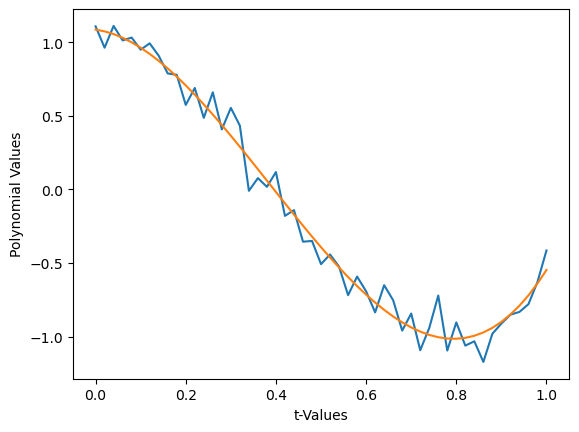

In [11]:
import numpy as np
from matplotlib import pyplot as plt

t = np.arange(0, 1.02, 0.02)
y = np.cos(4 * t) + 0.1 * np.random.randn(t.shape[0])

degree = 4
coefficients = np.polyfit(t, y, degree)
smooth_curve = np.polyval(coefficients, t)

plt.plot(t,y)
plt.plot(t, smooth_curve)
plt.xlabel('t-Values')
plt.ylabel('Polynomial Values')
plt.show()

# TΕΛΟΣ